# Machine Learning Challenge

# ProblemStatement :
Predicting the amount that would be deposited in each branch in the year 2017

# LoadingData

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")
# pd.set_option('display.float_format', lambda x: '%.3f' % x) ### It helps to supress scientific notation
# pd.set_option("display.max_rows",None)  ### It helps us to view full dataframe

In [3]:
df.head()

,id,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
0,1,0,2871,1911-06-02,Wales,Waukesha,WI,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00
1,2,0,2872,NaN,Germantown,Washington,WI,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50
2,3,0,2873,1908-06-04,Brookfield,Waukesha,WI,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75
3,4,0,2874,NaN,Pewaukee,Waukesha,WI,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25
4,5,0,2875,NaN,Waukesha,Waukesha,WI,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25


In [4]:
df.info() ### This helps us to Know whether there are null values and also helps to see to which type it belongs to

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3790 non-null   int64  
 1   headquarter            3790 non-null   int64  
 2   location.Code          3790 non-null   int64  
 3   date_of_establishment  1750 non-null   object 
 4   location               3790 non-null   object 
 5   loc.details            3790 non-null   object 
 6   state                  3790 non-null   object 
 7   deposit_amount_2011    3050 non-null   float64
 8   deposit_amount_2012    3212 non-null   float64
 9   deposit_amount_2013    3461 non-null   float64
 10  deposit_amount_2014    3615 non-null   float64
 11  deposit_amount_2015    3734 non-null   float64
 12  deposit_amount_2016    3771 non-null   float64
 13  deposit_amount_2017    3771 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 414.7+ 

In [5]:
df.describe()  ## This gives us the summary or statistics of dataframe
               ### Note: The following is only for Dimensions in  dataframe not for measures(only for numerical not for categorical)

,id,headquarter,location.Code,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
count,3790.000000,3790.0,3790.000000,3.050000e+03,3.212000e+03,3.461000e+03,3.615000e+03,3.734000e+03,3.771000e+03,3.771000e+03
mean,1895.500000,0.0,5395.806332,1.683201e+05,1.882705e+05,1.933803e+05,2.045743e+05,2.183874e+05,2.364422e+05,3.546633e+05
std,1094.223088,0.0,1549.105135,4.196386e+06,5.171073e+06,5.320718e+06,5.610536e+06,5.970416e+06,6.422120e+06,9.633180e+06
min,1.000000,0.0,2871.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,948.250000,0.0,4067.250000,2.839800e+04,3.019912e+04,3.159750e+04,3.497175e+04,3.935850e+04,4.632150e+04,6.948225e+04
50%,1895.500000,0.0,5261.500000,5.344200e+04,5.577450e+04,5.961600e+04,6.353700e+04,7.015800e+04,7.877400e+04,1.181610e+05
75%,2842.750000,0.0,6863.250000,9.910912e+04,1.004205e+05,1.072440e+05,1.145288e+05,1.249448e+05,1.373490e+05,2.060235e+05
max,3790.000000,0.0,7994.000000,2.303660e+08,2.915820e+08,3.110520e+08,3.350930e+08,3.623109e+08,3.919391e+08,5.879087e+08


# NA_Value Check

In [6]:
df.isna().sum()

id                          0
headquarter                 0
location.Code               0
date_of_establishment    2040
location                    0
loc.details                 0
state                       0
deposit_amount_2011       740
deposit_amount_2012       578
deposit_amount_2013       329
deposit_amount_2014       175
deposit_amount_2015        56
deposit_amount_2016        19
deposit_amount_2017        19
dtype: int64

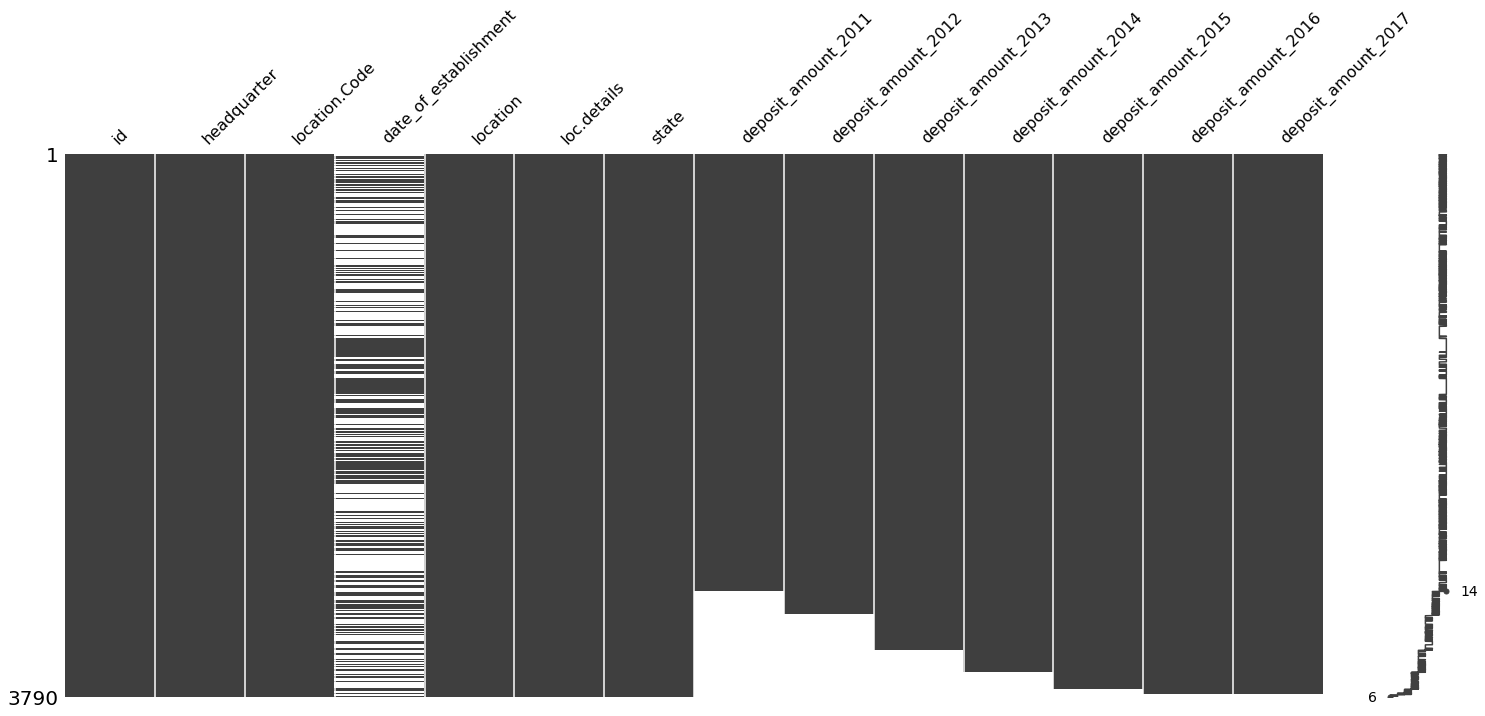

In [7]:
import missingno as ms
ms.matrix(df)

#### From above we can see that there are null values in our dataframe

In [8]:
df.shape

(3790, 14)

In [9]:
### I want to remove the column date_of_establishment because there are 2040 null values which is 53 % of total rows
## If I Fillna with anything(i.e mean,median) then that would lead to biased state
### So I'm removing that Particular Column

In [10]:
df.drop("date_of_establishment",axis=1,inplace=True)
df.head()

,id,headquarter,location.Code,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
0,1,0,2871,Wales,Waukesha,WI,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00
1,2,0,2872,Germantown,Washington,WI,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50
2,3,0,2873,Brookfield,Waukesha,WI,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75
3,4,0,2874,Pewaukee,Waukesha,WI,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25
4,5,0,2875,Waukesha,Waukesha,WI,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25


In [11]:
x = df.isna().sum().index[6:]
for i in range(len(x)):
           print(x[i],":",((df.isna().sum().values[6:].tolist()[i]/df.shape[0])*100)) 
        ### This gives us the Percentage of Nullvalues to those of Original
    

deposit_amount_2011 : 19.525065963060687
deposit_amount_2012 : 15.250659630606862
deposit_amount_2013 : 8.680738786279683
deposit_amount_2014 : 4.617414248021108
deposit_amount_2015 : 1.4775725593667546
deposit_amount_2016 : 0.5013192612137204
deposit_amount_2017 : 0.5013192612137204


#### Filling NA with Median values to get rid of Outliers

In [12]:
for i in range(6,13):
    df[df.columns[i]].fillna(df[df.columns[i]].median(),inplace = True)

In [13]:
df.isna().sum()

id                     0
headquarter            0
location.Code          0
location               0
loc.details            0
state                  0
deposit_amount_2011    0
deposit_amount_2012    0
deposit_amount_2013    0
deposit_amount_2014    0
deposit_amount_2015    0
deposit_amount_2016    0
deposit_amount_2017    0
dtype: int64

In [14]:
df.shape

(3790, 13)

In [15]:
df.tail()

,id,headquarter,location.Code,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
3785,3786,0,7986,Compton,Los Angeles,CA,53442.0,55774.5,59616.0,63537.0,70158.0,78774.0,118161.0
3786,3787,0,7987,Las Vegas,Clark,NV,53442.0,55774.5,59616.0,63537.0,70158.0,78774.0,118161.0
3787,3788,0,7989,Irvine,Orange,CA,53442.0,55774.5,59616.0,63537.0,70158.0,78774.0,118161.0
3788,3789,0,7993,New Orleans,Orleans,LA,53442.0,55774.5,59616.0,63537.0,70158.0,78774.0,118161.0
3789,3790,0,7994,Buffalo,Erie,NY,53442.0,55774.5,59616.0,63537.0,70158.0,78774.0,118161.0


# Now We can Apply Some MachineLearning Algorithms For Predictions

# Linear Regression is an Algorithm which his helpful for Prediction as it is a Predictive Modelling Technique

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
df.columns

Index(['id', 'headquarter', 'location.Code', 'location', 'loc.details',
       'state', 'deposit_amount_2011', 'deposit_amount_2012',
       'deposit_amount_2013', 'deposit_amount_2014', 'deposit_amount_2015',
       'deposit_amount_2016', 'deposit_amount_2017'],
      dtype='object')

In [55]:
x = df[['id','deposit_amount_2011', 'deposit_amount_2012',
       'deposit_amount_2013', 'deposit_amount_2014', 'deposit_amount_2015',
       'deposit_amount_2016']]
y = df[['deposit_amount_2017']]

In [56]:
lr.fit(x,y)

LinearRegression()

In [57]:
df1 = pd.read_csv("test.csv")

In [58]:
df1.columns

Index(['id', 'headquarter', 'location.Code', 'date_of_establishment',
       'location', 'loc.details', 'state', 'deposit_amount_2011',
       'deposit_amount_2012', 'deposit_amount_2013', 'deposit_amount_2014',
       'deposit_amount_2015', 'deposit_amount_2016'],
      dtype='object')

In [59]:
df1.isna().sum()

id                         0
headquarter                0
location.Code              0
date_of_establishment    814
location                   0
loc.details                0
state                      0
deposit_amount_2011        0
deposit_amount_2012        0
deposit_amount_2013        0
deposit_amount_2014        0
deposit_amount_2015        0
deposit_amount_2016        0
dtype: int64

In [60]:
x1 =  df1[['id','deposit_amount_2011',
       'deposit_amount_2012', 'deposit_amount_2013', 'deposit_amount_2014',
       'deposit_amount_2015', 'deposit_amount_2016']]

In [61]:
pd.set_option("display.float_format",lambda x:"%.3f" % x)
pd.set_option("display.max_rows",None)
y_pred = pd.DataFrame(lr.predict(x1))
y_pred.columns = ["deposit_amount_2017_Predicted"]
y_pred["id"] = df1["id"]
y_pred  = y_pred[y_pred.columns.reindex(["id","deposit_amount_2017_Predicted"])[0]]
y_pred

,id,deposit_amount_2017_Predicted
0,1,2406206250.000
1,2,768318.750
2,3,590523.750
3,4,262737.000
4,5,502200.000
5,6,327372.750
6,7,241123.500
7,8,127559.250
8,9,186201.000
9,10,188950.500


In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rfr = RandomForestRegressor()

In [64]:
rfr.fit(x,y)

C:\Users\aakas\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [65]:
pd.DataFrame(rfr.predict(x1))

,0
0,413394709.567
1,773600.963
2,593216.955
3,262790.167
4,503140.343
5,326928.240
6,240941.272
7,127489.747
8,186271.448
9,188898.728


In [66]:
y_pred[y_pred.deposit_amount_2017_Predicted <=0]

,id,deposit_amount_2017_Predicted
270,271,-0.000
308,309,-0.000
333,334,-0.000
367,368,-0.000
368,369,-0.000
369,370,-0.000
370,371,-0.000
371,372,-0.000
373,374,-0.000
374,375,-0.000


In [67]:
y_pred.median()[1]

201496.49999999793

In [68]:
import numpy as np
a = np.array(y_pred["deposit_amount_2017_Predicted"].values.tolist())
print (a)
y_pred["deposit_amount_2017_Predicted"] = np.where(a <= 0,y_pred.median()[1] , a).tolist()
print (y_pred)
         

[2.40620625e+09 7.68318750e+05 5.90523750e+05 ... 2.06923500e+05
 1.83485250e+05 5.35905000e+04]
        id  deposit_amount_2017_Predicted
0        1                 2406206250.000
1        2                     768318.750
2        3                     590523.750
3        4                     262737.000
4        5                     502200.000
5        6                     327372.750
6        7                     241123.500
7        8                     127559.250
8        9                     186201.000
9       10                     188950.500
10      11                     819978.750
11      12                     367506.000
12      13                     302568.750
13      14                     412974.000
14      15                     626730.750
15      16                     512205.750
16      17                     174456.000
17      18                    1308881.250
18      19                     956630.250
19      20                     274995.000
20      21           

In [69]:
y_pred

,id,deposit_amount_2017_Predicted
0,1,2406206250.000
1,2,768318.750
2,3,590523.750
3,4,262737.000
4,5,502200.000
5,6,327372.750
6,7,241123.500
7,8,127559.250
8,9,186201.000
9,10,188950.500


In [70]:
y_pred.to_csv("D:/Hakothon(July-12)/y_pred_dropna_new.csv")